In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np

import torch
from tqdm import tqdm

sys.path.insert(0, "./../")

%load_ext autoreload
%autoreload 2

/cvlabdata2/home/davydov/miniconda3/envs/hmr_ssl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import src

In [4]:
from src.utils.plot_utils_experiment_check import load_metrics

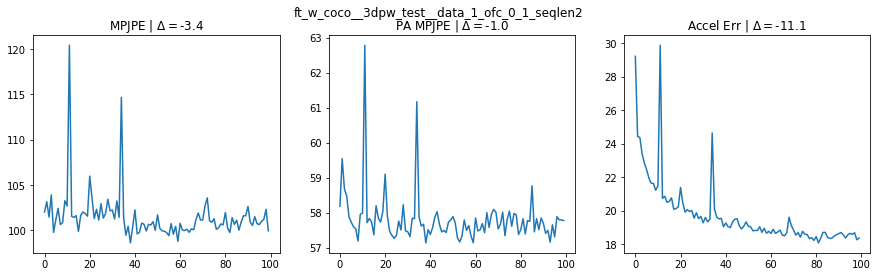

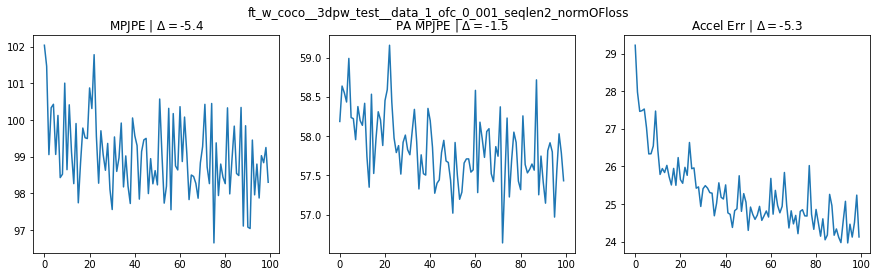

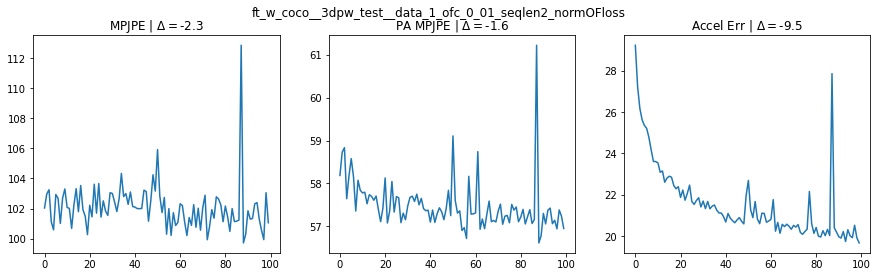

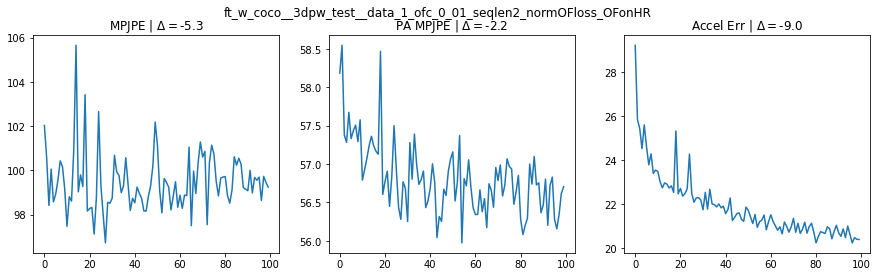

In [14]:
# exp_path = "../output/finetune_hmr_ssl/finetune_hmr_ssl_test__lr1e-6___cons_1__of_1e-4"
# exp_path = "../output/finetune_hmr_ssl/finetune_hmr_ssl_test__lr1e-6___cons_1__of_1e-4_(2)"
# exp_path = "../output/finetune_hmr_ssl/finetune_hmr_ssl_train__lr1e-6___cons_1__of_1e-4"

# exp_path = "../output/finetune_hmr_ssl_thresh/finetune_hmr_ssl_thresh_test__lr1e-6___cons_1__of_1e-4_ignore_thresh_100"
# exp_path = "../output/finetune_hmr_ssl/finetune_hmr_ssl_test__lr1e-6___cons_1__of_1e-4_seqlen2"
# exp_path = "../output/finetune_hmr_ssl/finetune_hmr_ssl_train__lr1e-6___cons_1__of_1e-4_seqlen2"
# exp_path = "../output/finetune_hmr_ssl/finetune_hmr_ssl_test__lr1e-6___cons_1__of_1e-4_camopt"
# exp_path = "../output/finetune_hmr_ssl/finetune_hmr_ssl_test__lr1e-5___cons_1__of_1e-4"


# exp_path = "../output/finetune_hmr_ssl_coco__video_dsets/ft_w_coco__3dpw_train__data_1_ofc_1000"
# exp_path = "../output/finetune_hmr_ssl_coco__video_dsets/ft_w_coco__pennaction__data_1_ofc_1000"
# exp_path = "../output/ft_w_coco_seqlen2/ft_w_coco__3dpw_train_h36m_train_test__data_1_ofc_1000"
# exp_path = "../output/ft_w_coco_seqlen2/ft_w_coco__h36m_train__data_1_ofc_1000"


exp_paths = [
#     "../output/finetune_hmr_ssl/finetune_hmr_ssl_test__lr1e-6___cons_1__of_1e-4",
#     "../output/finetune_hmr_ssl/finetune_hmr_ssl_test__lr1e-6___cons_1__of_1e-4_(2)",
    
    
    "../output/ft_w_coco_seqlen2_2try/ft_w_coco__3dpw_test__data_1_ofc_0_1_seqlen2",
#     "../output/ft_w_coco_seqlen2_2try/ft_w_coco__3dpw_train__data_1_ofc_0_1_seqlen2",
#     "../output/ft_w_coco_seqlen2_2try/ft_w_coco__h36m_train__data_1_ofc_0_1_seqlen2",
#     "../output/ft_w_coco_seqlen2_2try/ft_w_coco__pennaction__data_1_ofc_0_1_seqlen2",
    "../output/ft_w_coco_seqlen2_normOFloss/ft_w_coco__3dpw_test__data_1_ofc_0_001_seqlen2_normOFloss",
    "../output/ft_w_coco_seqlen2_normOFloss/ft_w_coco__3dpw_test__data_1_ofc_0_01_seqlen2_normOFloss",    
    
    "../output/ft_w_coco_seqlen2_normOFloss_OFonHR/ft_w_coco__3dpw_test__data_1_ofc_0_01_seqlen2_normOFloss_OFonHR",    
#     "../output/ft_w_coco_seqlen2_normOFloss_OFonHR/ft_w_coco__3dpw_train__data_1_ofc_0_01_seqlen2_normOFloss_OFonHR",    
#     "../output/ft_w_coco_seqlen2_normOFloss_OFonHR/ft_w_coco__h36m_train__data_1_ofc_0_01_seqlen2_normOFloss_OFonHR",    
#     "../output/ft_w_coco_seqlen2_normOFloss_OFonHR/ft_w_coco__h36m_train__data_1_ofc_0_01_seqlen2_normOFloss_OFonHR_colordistort",    
#     "../output/ft_w_coco_seqlen2_normOFloss_OFonHR/ft_w_coco__pennaction__data_1_ofc_0_01_seqlen2_normOFloss_OFonHR",    
#     "../output/ft_w_coco_seqlen2_normOFloss_OFonHR/ft_w_coco__pennaction__data_1_ofc_0_01_seqlen2_normOFloss_OFonHR_colordistort",    
    
#         "../output/ft_w_coco_seqlen2_texturepose/ft_w_coco_seqlen2_texturepose_3dpw_test__data_1_tp_0_001",    
#         "../output/ft_w_coco_seqlen2_texturepose/ft_w_coco_seqlen2_texturepose_3dpw_test__data_1_tp_0_01",    
#         "../output/ft_w_coco_seqlen2_texturepose/ft_w_coco_seqlen2_texturepose_3dpw_test__data_1_tp_0_1",    
#         "../output/ft_w_coco_seqlen2_texturepose/ft_w_coco_seqlen2_texturepose_3dpw_test__data_1_tp_1",  
#         "../output/ft_w_coco_seqlen2_texturepose/ft_w_coco_seqlen2_texturepose_3dpw_test__data_1_tp_10",
#         "../output/ft_w_coco_seqlen2_texturepose/ft_w_coco_seqlen2_texturepose_3dpw_test__data_1_tp_100",  
    
#     "../output/ft_w_coco_seqlen2_normOFloss_context/ft_w_coco__3dpw_test__data_1_ofc_0_01_seqlen2_normOFloss_context",    
]




plot_train = False
plot_valid = True
num = 1

for exp_path in exp_paths:

    if plot_train:
        ### training losses figure
        training_losses = [
    #         ["kpts2d_loss_train", "Kpts 2d train"],
    #         ["kpts3d_loss_train", "Kpts 3d train"],
    #         ["smpl_pose_loss_train", "smpl_pose_loss train"],
    #         ["smpl_shape_loss_train", "smpl_shape_loss train"],
    #         ["smpl_shape_prior_loss_train", "smpl_shape_prior_loss train"],
#             ["camera_scale_reg_loss_train", "camera_scale_reg_loss train"],

        #     ["j3d_cons_train", "j3d cons train"],
        #     ["shape_cons_train", "shape cons train"],

            ["flow_2d_train", "OFC train"],
            ["full_train", "FULL train"],
        ]

        fig, ax = plt.subplots(1, len(training_losses), figsize=(len(training_losses)*5, 4))
        fig.suptitle(exp_path.split("/")[-1])

        for axis, (loss_name, label) in zip(ax, training_losses):
            axis.plot(load_metrics(f"{exp_path}/metrics/{loss_name}.pth", num=num))
            axis.set_title(label);

    if plot_valid: 
        ### validation losses figure
        valid_losses = [
            ["mpjpe_valid", "MPJPE"],
            ["pa_mpjpe_valid", "PA MPJPE"],
            ["accel_err_valid", "Accel Err"],
        ]
        fig, ax = plt.subplots(1, len(valid_losses), figsize=(5*len(valid_losses), 4))

        fig.suptitle(exp_path.split("/")[-1])
        for axis, (loss_name, label) in zip(ax, valid_losses):
            valid_arr = load_metrics(f"{exp_path}/metrics/{loss_name}.pth")
#             if loss_name == "mpjpe_valid": axis.set_ylim((97, 99))
            axis.plot(valid_arr)
            axis.set_title(label + f" | $\Delta=${min(valid_arr) - valid_arr[0]:.1f}");


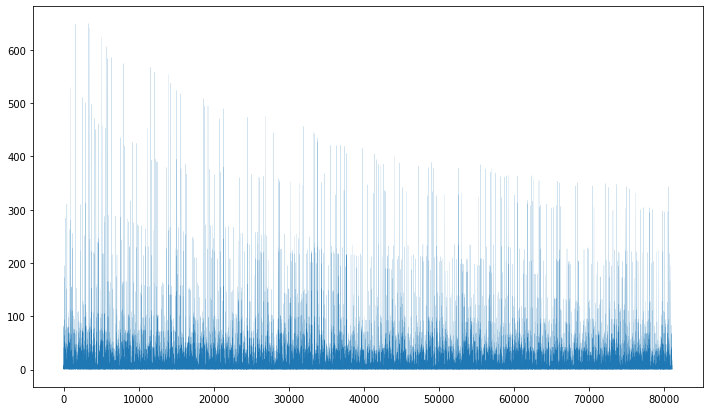

In [7]:
### what are the statistics of OF loss?

of_arr = load_metrics(f"{exp_path}/metrics/flow_2d_train.pth", remove_tail=False, num=100, avg=False)

fig, ax = plt.subplots(1,1, figsize=(12,7))
ax.plot(of_arr, linewidth=0.1)

of_arr_sorted = sorted(of_arr)
quantiles = torch.arange(len(of_arr_sorted))/len(of_arr_sorted)


In [8]:
of_arr.median(), of_arr.mean()

(tensor(2.2535), tensor(7.5811))

In [9]:
of_arr_sorted[int(len(of_arr) * 0.1)], \
of_arr_sorted[int(len(of_arr) * 0.5)], \
of_arr_sorted[int(len(of_arr) * 0.95)], \
of_arr_sorted[int(len(of_arr) * 0.99)], \
of_arr_sorted[-1]

(tensor(0.6628),
 tensor(2.2535),
 tensor(32.9197),
 tensor(101.3670),
 tensor(649.6030))

In [10]:
torch.tensor(of_arr_sorted[:int(len(of_arr) * 0.1)]).std(), \
torch.tensor(of_arr_sorted[:int(len(of_arr) * 0.5)]).std(), \
torch.tensor(of_arr_sorted[:int(len(of_arr) * 0.95)]).std(), \
torch.tensor(of_arr_sorted[:int(len(of_arr) * 0.99)]).std(), \
torch.tensor(of_arr_sorted).std(), 

(tensor(0.1864),
 tensor(0.5964),
 tensor(4.4624),
 tensor(11.3150),
 tensor(25.7556))

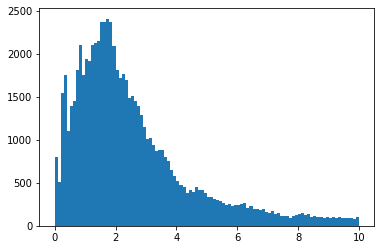

In [11]:
plt.hist(of_arr, bins=100, range=(0,10));